## Машинное обучение: регрессия

Регрессия - это класс алгоритмов машинного обучения, в которых нам необходимо научиться предсказывать значение некоторой численной величины.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree

В качестве пример рассмотрим датасет стоимости железнодорожных билетов между некоторыми европейскими городами:

In [2]:
df = pd.read_csv("../../data/renfe-rail-sample.zip",compression='zip')
df

,Unnamed: 0,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,departure_hour,geodistance
0,37402744,37402745,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.83,AVE,Turista,108.90,Flexible,232.0,18,506.741151
1,37402745,37402746,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,2.50,AVE,Turista Plus,115.65,Promo +,40.0,19,506.741151
2,37402746,37402747,renfe,MADRID,BARCELONA,2020-09-28,2020-09-28,3.17,AVE,Turista,108.90,Flexible,177.0,20,506.741151
3,37402747,37402748,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.17,AVE,Turista,108.90,Flexible,279.0,7,506.741151
4,37402748,37402749,renfe,MADRID,BARCELONA,2020-10-10,2020-10-10,3.07,AVE,Turista,108.90,Flexible,238.0,9,506.741151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246671,38753055,38753056,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.85,AVE,Turista Plus,54.75,Promo +,15.0,18,256.506445
1246672,38753056,38753057,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.80,AVE,Turista,60.90,Flexible,215.0,18,256.506445
1246673,38753057,38753058,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,2.12,ALVIA,Turista,53.60,Flexible,20.0,19,256.506445
1246674,38753058,38753059,renfe,ZARAGOZA,BARCELONA,2020-10-08,2020-10-08,1.57,AVE,Turista,60.90,Flexible,29.0,19,256.506445


Разобьем весь датасет на обучающую и тестовую выборку:

In [3]:
df_train, df_test = sk.model_selection.train_test_split(df,train_size=0.8)

Попробуем использовать один параметр для прогнозирования - расстояние между городами. Для начала, изобразим это на графике:

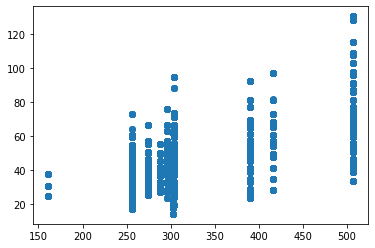

In [4]:
X = df_train["geodistance"]
Y = df_train["price"]
plt.scatter(X,Y)
plt.show()

### Линейная регрессия 

Линейная регрессия - простейшая модель, в которой функция предсказания цены будет линейной: $f_{a,b}(x) = ax+b$. Здесь $a$ и $b$ - параметры модели, которые необходимо подобрать.

В качестве функции ошибки возьмём среднеквадратичное отклонение, тогда ошибка

$$
L(a,b) = \sum_i (f_{a,b}(x_i)-y_i)^2 = \sum_i (ax_i+b-y_i)^2
$$

Для нахождения минимума ошибки найдём ноль производной:

$$
\begin{cases}
{\partial L\over\partial b} = \sum_i 2(ax_i+b-y_i) = 0 \cr
{\partial L\over\partial a} = \sum_i 2(ax_i+b-y_i)x_i = 0
\end{cases}
$$

Отсюда:
$$
\begin{cases}
a\sum x_i + nb  = \sum y_i \\
a\sum x_i^2 + b\sum x_i = \sum x_iy_i
\end{cases}
$$

Решая эту систему уравнения относительно $a$ и $b$, получаем:
$$
\begin{cases}
a = {\sum x_i\sum y_i - n\sum x_iy_i \over (\sum x_i)^2 - n\sum x_i^2} \\
b = {\sum y_i\sum x_i^2 - \sum x_i\sum x_iy_i \over \sum x_i^2(n - \sum x_i) }
\end{cases}
$$

Такой подход к аналитическому решению уравнений называется **методом наименьших квадратов**.

In [5]:
n = len(X)
a = (X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()*X.sum()-n*(X*X).sum())
b = (Y.sum()*(X*X).sum()-X.sum()*(X*Y).sum())/(X*X).sum()/(n-X.sum())
print(f"a={a}, b={b}")

a=0.15123325485316544, b=-0.0006821076936871716


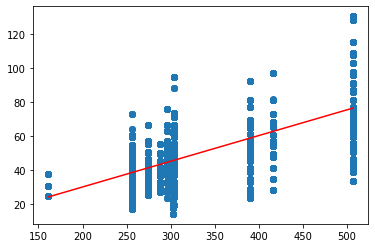

In [6]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Посчитаем ошибку на тестовой выборке. Типовые ошибки для регрессии (здесь за $y$ обозначено целевое значение, $\hat y$ - предсказанное значение):

* Среднеквадратичное отклонение (MSE, Mean Squared Error):

$$
{\mathrm MSE}(y,\hat y) = {1\over n}\sum_{i=1}^N (y_i-\hat y_i)^2
$$

* Средняя ошибка (MAE, Mean Absolute Error):

$$
{\mathrm MAE}(y,\hat y) = {1\over n}\sum_{i=1}^N |y_i-\hat y_i|
$$

* Относительная средняя ошибка (RMAE, Relative Mean Absolute Error) - показывает, в процентах, на сколько мы ошибаемся относительно среднего значения целевой величины $y$:

$$
{\mathrm RMAE}(y,\hat y) = {\sum_{i=1}^N |y_i-\hat y_i| \over \sum_{i=1}^N y_i}
$$

In [7]:
X_t, Y_t = df_test["geodistance"], df_test["price"]

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(a*X_t+b,Y_t))}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")

MSE=16.322232128002106, MAE=13.630593091963641, MAE(%)=0.2853559600002625


### Категориальные признаки

Наверное, основной вклад в предсказание цены вносят такие параметры, как класс или используемый тариф:

In [8]:
df["fare"].value_counts()

Promo +       566980
Flexible      422474
Adulto ida    257222
Name: fare, dtype: int64

Построим среднее значение цены в зависимости от тарифа:

<AxesSubplot:xlabel='fare'>

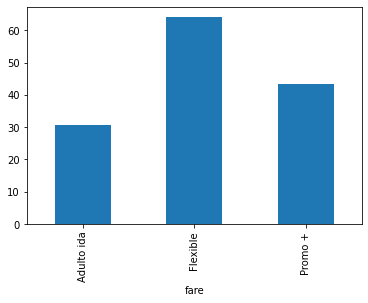

In [9]:
df.groupby('fare').mean()['price'].plot(kind='bar')

Для представления категориальных признаков, можно использовать различные подходы:
* Простой **Label Encoding**, когда каждое уникальное значение заменяется соответствующим численным значением. Этот способ хорошо использовать тогда, когда категориальные значения некоторым образом логически упорядочены, например оценки **удовлетворительно**, **хорошо** и **отлично** можно заменять цифрами 1, 2 и 3 соответственно - это отражает логическую зависимость в данных. Такой подход нельзя применять для неупорядоченных значений, например, цветов - в этом случае мы вносим дополнительные зависимости в данные, которых там не было.
* **One-Hot Encoding**, в котором для каждого значения заводится отдельный столбец из нулей или единиц. Например, для цветов, красный может представляться вектором (1,0,0,0,0,0,0), а зелёный: (0,0,0,1,0,0,0).
* Есть и другие способы кодирования, описанные [в этой заметке](https://habr.com/ru/post/666234/)

В нашем случае, мы можем использовать оба подхода. С учётом построенного выше графика, тарифы можно расположить в порядке возрастания цены: Adulto, Promo+, Flexible - и закодировать соответственно цифрами 0, 1 и 2. Либо использовать one-hot encoding. 

## Scikit Learn

Стандартом де факто для классического машинного обучения является библиотека [Scikit Learn](https://scikit-learn.org/stable/index.html). Реализуем линейную регрессию с помощью этой библиотеки. Для начала, выделим значимые численные и категориальные признаки:

In [11]:
numeric = ['geodistance','duration','departure_hour']
categorical = ['vehicle_type','vehicle_class','fare']

Для обучения линейной регрессии на числовых признаках, используем следующий код:

In [12]:
X = df_train[numeric]
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)

Основной метод для обучения модели - `fit`. По-английски подбор параметров модели называется *fitting the model*, поскольку мы подбираем такие значения параметров, которые минимизируют ошибку.

Вычислим точность на тестовой выборке:

In [14]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=224.177830869099, MAE=11.962177011174115, MAE(%)=0.28873067751752135


Можем посмотреть коэффициенты модели:

In [15]:
print(f"Coefficients={model.coef_}, bias={model.intercept_}")

Coefficients=[ 0.17555322 -3.96920792  0.19882399], bias=2.074295122958816


Для кодирования признаков, также можно использовать механизм Scikit Learn. Соответствующие объекты называюется **Encoder**. Вот как мы можем использовать энкодеры:

In [16]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[["fare","vehicle_class"]])
print(ohe.categories_)
ohe.transform(df[["fare","vehicle_class"]]).toarray()[:10]

[array(['Adulto ida', 'Flexible', 'Promo +'], dtype=object), array(['Turista', 'Turista Plus', 'Turista con enlace'], dtype=object)]


array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Для того, чтобы применить различные энкодеры к различным полям, существует удобный механизм трансформеров. Например, получим таблицу с нужными нам полями, описав преобразователи для всех категориальных полей:

In [27]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
    remainder='passthrough'
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 274.36475269,   1.52      ,  21.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        , 303.57326384,   5.92      ,  11.        ]])

Полученные значения можно использовать для обучения модели:

In [18]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=75.43938660933367, MAE=6.040937839404189, MAE(%)=0.14003415311514217


### Нормализация значений

Для того, чтобы модель не отдавала предпочтение некоторым из признаков, обычно прибегают к масштабированию признаков. Поскольку one-hot encoding даёт нам признаки, находящиеся в диапазоне от 0 до 1, то и остальные признаки имеет смысл приводить к примерно такому же диапазону.

В SkLearn удобно использовать два вида нормализации:
* `MinMaxScaler` - преобразует значения строго к диапазону 0-1, вычитая минимальное значение, и деля на интервал между максимальным и минимальным.
* `StandardScaler` - вычитает из значений среднее и делит на дисперсию

Мы можем встроить нормализацию в наш конвейер предобработки:


In [32]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(),['geodistance']),
    (sk.preprocessing.StandardScaler(),['duration']),
    (sk.preprocessing.MinMaxScaler(),['departure_hour']),
    (sk.preprocessing.OneHotEncoder(),['fare']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(),['vehicle_class']),
)
X = transformer.fit_transform(df_train[numeric+categorical])
X.toarray()[:2]

array([[-0.27691341, -0.61743095,  0.9375    ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.01718516,  2.12022665,  0.3125    ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

In [33]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorical])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=75.43938646546295, MAE=6.040938062249295, MAE(%)=0.14003414085667532


### Добавление атрибутов

Иногда, результат может зависеть от входных признаков нелинейно. Например, количество оставшихся денег на счете в случае со сложными процентами скорее всего будет зависеть от времени экспоненциально. В этом случае мы можем улучшить точность можели, заменив входное значение его логарифмом.

Аналогичным образом можно пытаться добавлять в исходный датасет различные функции от входных переменных или их комбинаций, которые становятся новыми признаками в линейной модели. Один из подходов, который позволяет отслеживать зависимость результата от комбинаций признаков, является добавление полиномиальных признаков. Например, если исходный датасет включает в себя признаки $x_1, x_2, x_3$, то добавляя все полиномиальные признаки степени 2, получим $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3$, вдобавок к исходным признакам.

Добавление полиномиальных комбинаций признаков можно сделать с помощью трансформера:

In [21]:
poly = sk.preprocessing.PolynomialFeatures()
Xp = poly.fit_transform(X)
X.shape,Xp.shape

((997340, 24), (997340, 325))

Видим, что из 24 признаков мы получили 325!

Обучаем модель на расширенном наборе признаков:

In [22]:
model.fit(Xp,Y)

Xp_t = poly.transform(X_t)
Yp_t_pred = model.predict(Xp_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Yp_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Yp_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Yp_t_pred)}")

MSE=50.234531253521865, MAE=4.622373366726125, MAE(%)=0.10949093710361897


### Используем пайплайны

В нашем последнем примере мы сначала использовали `ColumnTransformer` чтобы закодировать нечисловые значения, а затем `PolynomialFeatures` для добавления полиномиальных признаков, после чего подавали полученные данные на вход модели `LinearRegression` для обучения.

Мы можем объединить эти шаги в единый **конвейер** (или **пайплайн**), поскольку все элементы этого конвейера имеют единый интерфейс в виде методов `fit` и `fit_transform`:

In [23]:
pipe = sk.pipeline.Pipeline([
    ('ColumnTransform',transformer),
    ('PolyFeatures',poly),
    ('LinearModel',model)
])
pipe.fit(df_train[numeric+categorical],Y)
pipe.score(df_test[numeric+categorical],Y_t)

0.8970578735988729

Таким образом, с помощью нескольких строчек кода мы построили конвейер предобработки данных, обучили модель, и проверили её метрику качества (accuracy). 

### Деревья решений

В нашем случае понятно, что цены на билеты в зависимости от тарифа могут меняться скачкообразно, т.е. для каждого тарифа могут применяться свои правила ценообразования. Для таких случаев можно использовать другой алгоритм машинного обучения - **деревья решений**. Дерево решений смотрит на некоторый признак, и в зависимости от его значения рассматривает два и более вариантов решений. В каждом из вариантов выбирается другой признак, и так далее.

Попробуем обучить алгоритм дерева решений на наших данных:

In [24]:
model = sk.tree.DecisionTreeRegressor()
model = model.fit(X,Y)

Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=33.4168691924618, MAE=2.837246068424855, MAE(%)=0.07064392478250266


Как видим, использование деревьев дает нам весьма высокую точность!

Деревья также являются интерпретируемой моделью, однако визуализация большого дерева не слишком наглядна. Для наглядности, ограничим глубину обучаемого дерева - это снизит точность, но позволит нам визуализировать дерево более наглядно: 

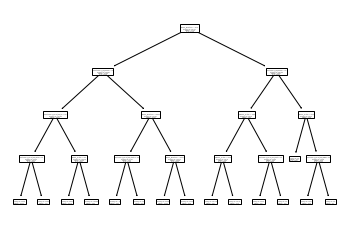

In [28]:
model = sk.tree.DecisionTreeRegressor(max_depth=4)
model = model.fit(X,Y)

z = sk.tree.plot_tree(model,feature_names=transformer.get_feature_names_out())

Для более качественного отображения имеет смысл использовать библиотеку **GraphViz**. Её необходимо установить с помощью `conda install python-graphviz` в ваше окружение.

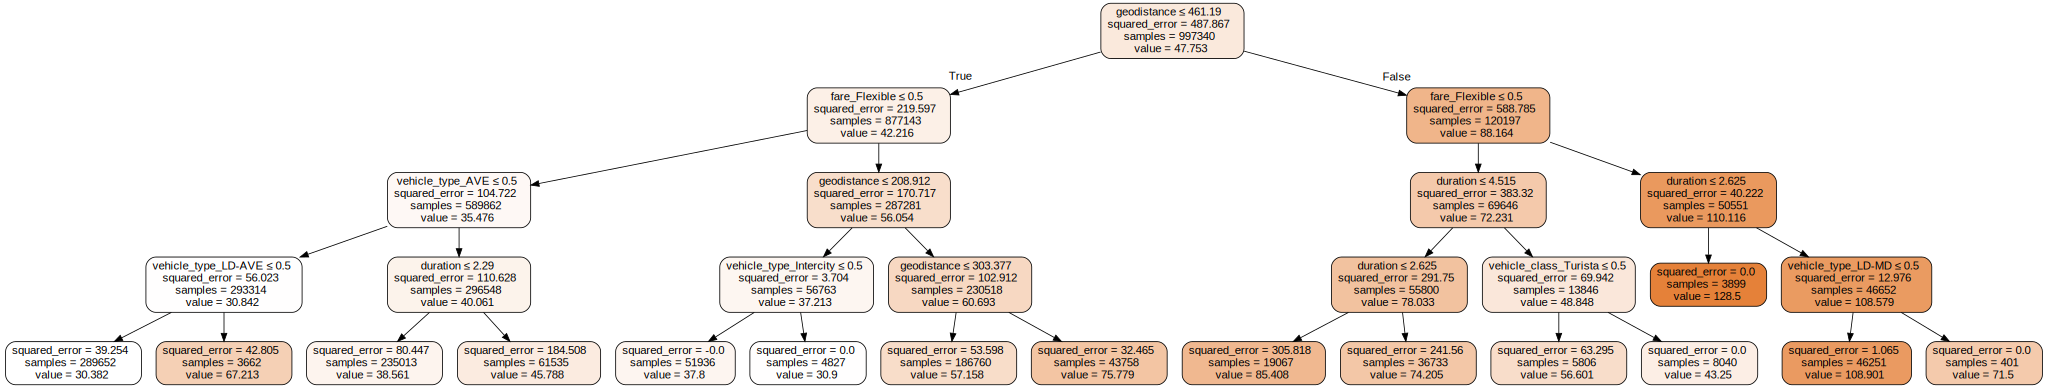

In [29]:
import graphviz
graphviz.backend.dot_command.DOT_BINARY = 'c:/winapp/conda/Library/bin/graphviz/dot.exe'

def proc_feature_name(x):
    return x.replace('onehotencoder-1__','')\
        .replace('onehotencoder-2__','')\
        .replace('onehotencoder-3__','')\
        .replace('remainder__','')

feature_names = [proc_feature_name(x) for x in transformer.get_feature_names_out()]

graphviz.Source(
    sk.tree.export_graphviz(model,feature_names=feature_names,
    filled=True, rounded=True, special_characters=True)
)

## Нейросети. Персептрон

Наиболее мощным подходом к решению задач машинного обучение на сегодняшний момент являются нейросети. Простейшая нейросетевая модель - это **однослойный персептрон**, который по сути аналогичен линейной регрессии. В нашем случае для предсказания одного значения у нейросети будет несколько входов (по количеству признаков), и один выход. Такая сеть будет содержать в себе один нейрон, поведение которого будет определяться весами.

Для работы с нейросетями используются различные бибилотеки. Мы рассмотрим наиболее простой фреймворк Keras (является составной частью более мощной библиотеки TensorFlow от Google).

In [30]:
import tensorflow as tf
from tensorflow import keras

Нейросети оперируют **тензорами** - объектами, похожими на массивы numpy, но вычисления с которыми могут производиться на графических процессорах. Перед обучением нам необходимо привести наши данные к числовому виду, т.е. осуществить преобразование категориальных признаков и нормализацию. В нашем случае мы это уже сделали ранее, и данные содержатся в переменных `X` и `Y` (обучающая) и `X_t`/`Y_t` (тестовая выборка).

Далее описываем архитектуру сети. Сеть состоит из слоёв, в нашем случае - это один полносвязный слой `Dense`:

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=(24,))
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


Для указания того, какую функцию ошибки использовать при обучении сети, и какой оптимизатор, используется метод `compile`:

In [36]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mape'])
hist = model.fit(X.toarray(),Y,validation_data=(X_t.toarray(),Y_t),epochs=5)

Epoch 1/5
31167/31167 [==============================] - 108s 3ms/step - loss: 507.2735 - mae: 14.9895 - mape: 31.0268 - val_loss: 88.6476 - val_mae: 6.6050 - val_mape: 15.8299
Epoch 2/5
31167/31167 [==============================] - 98s 3ms/step - loss: 82.9867 - mae: 6.3557 - mape: 15.1127 - val_loss: 80.1073 - val_mae: 6.2422 - val_mape: 14.7505
Epoch 3/5
31167/31167 [==============================] - 89s 3ms/step - loss: 78.5395 - mae: 6.1943 - mape: 14.6079 - val_loss: 77.4947 - val_mae: 6.1590 - val_mape: 14.4992
Epoch 4/5
31167/31167 [==============================] - 117s 4ms/step - loss: 76.6644 - mae: 6.1305 - mape: 14.3948 - val_loss: 76.2967 - val_mae: 6.1093 - val_mape: 14.3084
Epoch 5/5
31167/31167 [==============================] - 122s 4ms/step - loss: 75.8216 - mae: 6.0939 - mape: 14.2613 - val_loss: 75.7887 - val_mae: 6.0835 - val_mape: 14.1989


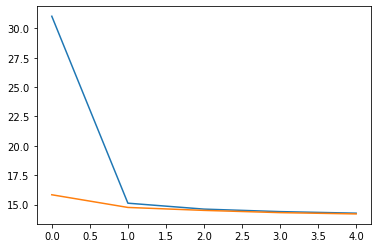

In [37]:
plt.plot(hist.history['mape'])
plt.plot(hist.history['val_mape'])
plt.show()

Мы видим, что полученный результат примерно соответствует модели линейной регрессии. Однако мощность нейросетевой модели может быть легко увеличена за счет увеличения количества слоёв, для чего достаточно просто изменить конфигурацию модели: 

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(20,input_shape=(24,),activation='sigmoid'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mape'])
hist = model.fit(X.toarray(),Y,validation_data=(X_t.toarray(),Y_t),epochs=5)

Epoch 1/5
31167/31167 [==============================] - 204s 7ms/step - loss: 173.2961 - mae: 7.1600 - mape: 15.2853 - val_loss: 47.7614 - val_mae: 4.3239 - val_mape: 10.2372
Epoch 2/5
31167/31167 [==============================] - 195s 6ms/step - loss: 46.3157 - mae: 4.1856 - mape: 9.9889 - val_loss: 45.6253 - val_mae: 4.0926 - val_mape: 9.7954
Epoch 3/5
31167/31167 [==============================] - 209s 7ms/step - loss: 45.2959 - mae: 4.0567 - mape: 9.6856 - val_loss: 45.1421 - val_mae: 3.9946 - val_mape: 9.6129
Epoch 4/5
31167/31167 [==============================] - 240s 8ms/step - loss: 44.8284 - mae: 4.0049 - mape: 9.5727 - val_loss: 44.7409 - val_mae: 4.0058 - val_mape: 9.5624
Epoch 5/5
31167/31167 [==============================] - 253s 8ms/step - loss: 44.3558 - mae: 3.9533 - mape: 9.4781 - val_loss: 44.2208 - val_mae: 3.9372 - val_mape: 9.4437


Как видим, мы получаем результаты, сравнимые с лучшей моделью дерева решений. В то время как при использовании классических моделей машинного обучения нам необходимо осуществлять подбор оптимальной модели, при использовании нейросетей мы можем просто увеличивать объем нейросети, пока она не будет достаточно точно подстраиваться под структуру входных данных.